<a href="https://colab.research.google.com/github/Prrriiitam/Gamma_Telescope_Prediction/blob/main/Magic_Gamma_Telescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("hello this is a free codecamp Project of Magic Gamma telescope")

hello this is a free codecamp Project of Magic Gamma telescope


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

As the csv data file has no labels so we have to manually put that

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names=cols)
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df["class"].unique()

array(['g', 'h'], dtype=object)

Our Computer is not good at understanding letters so change g & h to 0 & 1

In [5]:
df["class"] = df["class"].replace({"g": 1, "h": 0})
df

<ipython-input-5-71ca111c930e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["class"] = df["class"].replace({"g": 1, "h": 0})


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


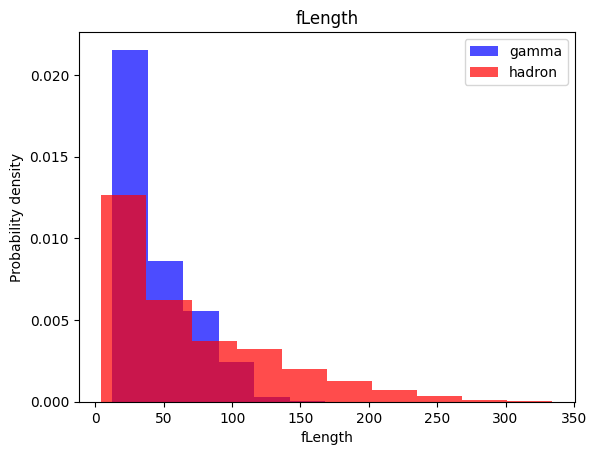

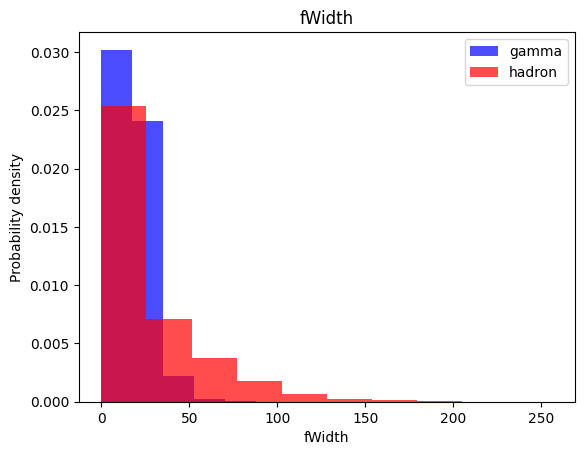

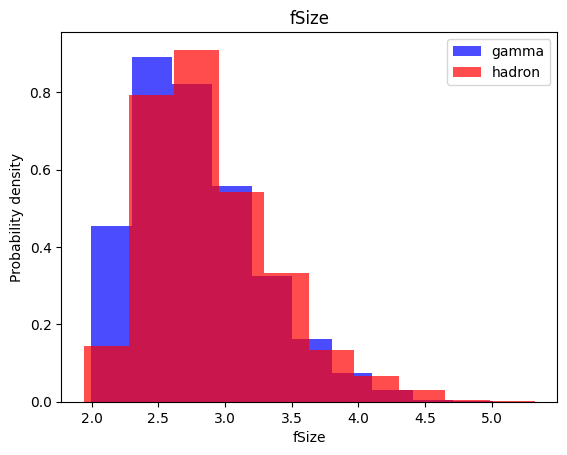

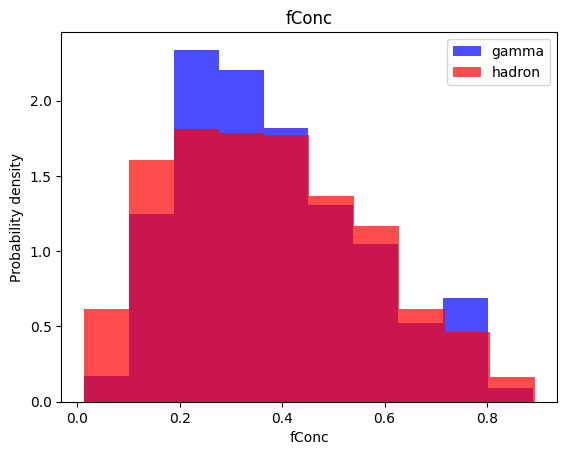

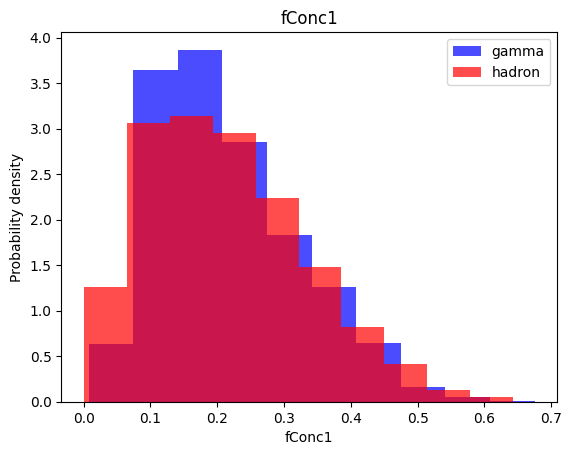

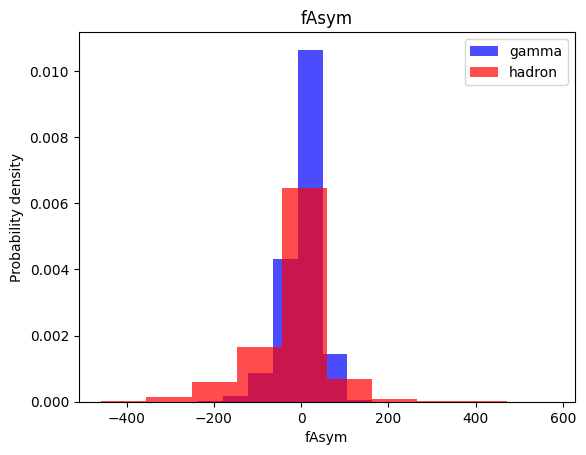

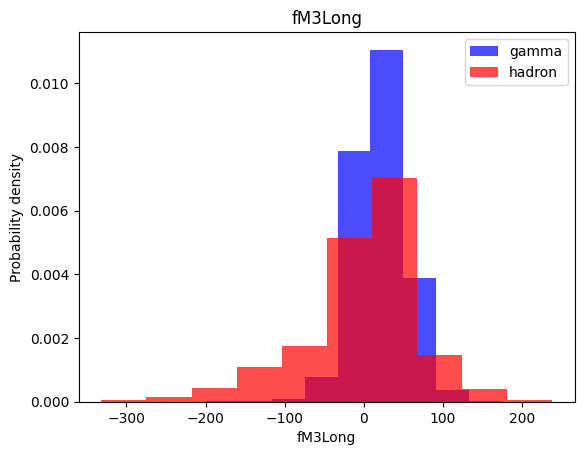

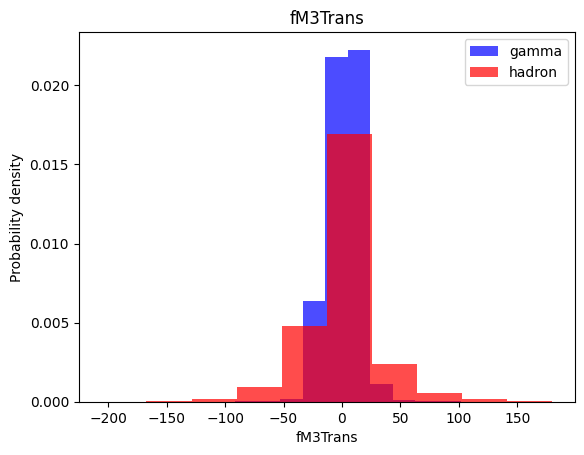

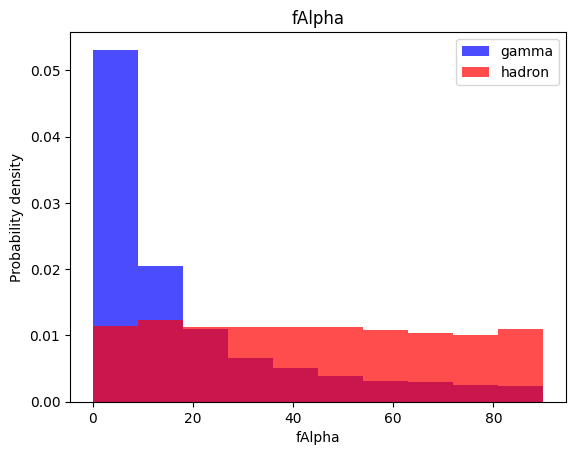

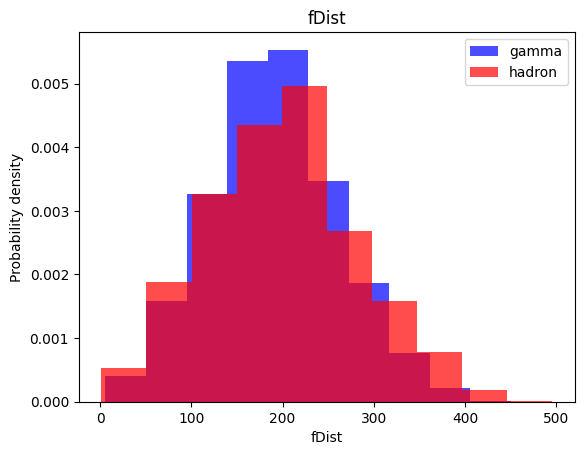

In [6]:
for label in cols[:-1]:
  plt.hist( df[df["class"] == 1][label], color="blue", label="gamma", alpha=0.7, density=True)
  plt.hist( df[df["class"] == 0][label], color="red", label="hadron", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability density")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train, Test And Validation Dataset

In [23]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


df.sample(frac=1 this will suffle the dataset

[int(0.6*len(df)), int(0.8*len(df))] This will split train to 0 - 60% valid to 60 - 80% and test to 80 - 100%  

In [8]:
def scale_dataset(dataframe, oversample = False):
  x = dataframe[dataframe.columns[:-1]].values # Here x conatins all data values expect the last column which is "class" its a 2D matrix
  y = dataframe[dataframe.columns[-1]].values  # It contains only the last column which is "class" & its a 1D array

  scaler = StandardScaler()
  x = scaler.fit_transform(x)#It normalizes or standardizes x to improve model performance and prevent certain features from dominating others.

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [9]:
print(len(train[train["class"] == 1])) #gamma
print(len(train[train["class"] == 0]))

7323
4089


The problem in your training dataset is class imbalance because the number of gammas (7k) is significantly higher than the number of hadrons (4k). This imbalance can cause the model to be biased toward predicting the majority class (gammas) more often, leading to poor generalization.
How to Handle Class Imbalance?
Resampling the Data

Oversampling the minority class (hadrons): Duplicate or generate synthetic hadron data using SMOTE (Synthetic Minority Over-sampling Technique).

Undersampling the majority class (gammas): Reduce the number of gammas to balance both classes.

Using Class Weights

Modify the loss function to assign a higher weight to the minority class (hadrons) so that the model learns their patterns better.


In [24]:
train, x_train, y_train =  scale_dataset(train, oversample=True)
valid, x_valid, y_valid =  scale_dataset(valid, oversample=False)
test, x_test, y_test =  scale_dataset(test, oversample=False)



In [11]:
len(y_train)

14646

In [12]:
len(y_train[y_train == 1])


7323

In [13]:
sum(y_train == 0)

np.int64(7323)

Now through oversampling we manage both classes to same

# KNN Model Implementations

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [15]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [17]:
y_test

array([0, 1, 1, ..., 0, 1, 0])

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1331
           1       0.86      0.85      0.86      2473

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.79      3804
weighted avg       0.81      0.81      0.81      3804



#Naive Bayes Model Implementation


In [22]:
from sklearn.naive_bayes import GaussianNB

In [25]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)


In [26]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1350
           1       0.73      0.90      0.81      2454

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



#Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [29]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1350
           1       0.84      0.82      0.83      2454

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



#SVM Model Implementation

If the dataset has outliers then SVM might not be a good model for that

In [30]:
from sklearn.svm import SVC

In [32]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1350
           1       0.88      0.89      0.89      2454

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



#Neural Network

In [33]:
import tensorflow as tf

In [50]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
  ax1.plot(history.history["loss"], label="loss")
  ax1.plot(history.history["val_loss"], label="val_loss")
  ax1.set_xlabel("Epochs")
  ax1.set_ylabel("Binary crossentropy")
  ax1.grid(True)


  ax2.plot(history.history["accuracy"], label="accuracy")
  ax2.plot(history.history["val_accuracy"], label="val_accuracy")
  ax2.set_xlabel("Epochs")
  ax2.set_ylabel("Accuracy")
  ax2.grid(True)

  plt.show()


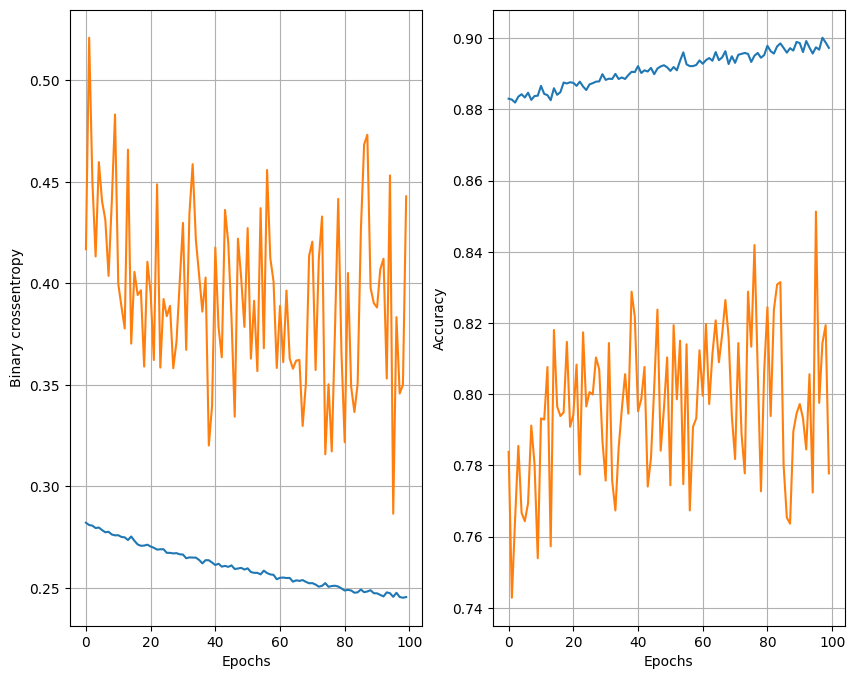

In [51]:
plot_history(history)

In [38]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu',input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#input_shape=(10,) means the input layer expects a 1D input vector with 10 features.
#The first layer of a model needs input_shape, but Keras automatically infers it for later layers.



nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss = 'binary_crossentropy',
                 metrics=['accuracy'])  #.0.001 is the learning rate

#The optimizer is responsible for updating model weights to minimize the loss function during training.
#Adam(0.001) stands for Adaptive Moment Estimation with a learning rate of 0.001.

#The loss function measures how far the model’s predictions are from the actual values.
#'binary_crossentropy' is used for binary classification problems (output: 0 or 1).
#This function penalizes incorrect predictions more strongly when the model is overconfident.


Now NN Model is ready now lets train it

In [45]:
history = nn_model.fit(
    x_train, y_train, epochs=100, batch_size = 32, validation_split=0.2
)
#The model will train for 10 epochs, meaning it will go through the dataset 10 times and update weights in each iteration.More epochs help the model learn better, but too many can lead to overfitting.
#if verbose is mentioned then it Controls how much training output is displayed. but here its not mentioned
#batch_size=32 defines how many samples the model processes before updating the weights.



Epoch 1/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8819 - loss: 0.2785 - val_accuracy: 0.7838 - val_loss: 0.4169
Epoch 2/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8842 - loss: 0.2742 - val_accuracy: 0.7429 - val_loss: 0.5211
Epoch 3/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8847 - loss: 0.2731 - val_accuracy: 0.7650 - val_loss: 0.4502
Epoch 4/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8841 - loss: 0.2792 - val_accuracy: 0.7855 - val_loss: 0.4133
Epoch 5/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8861 - loss: 0.2760 - val_accuracy: 0.7667 - val_loss: 0.4598
Epoch 6/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8834 - loss: 0.2787 - val_accuracy: 0.7644 - val_loss: 0.4404
Epoch 7/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8812 - loss: 0.2839 - val_accuracy: 0.7694 - val_loss: 0.4313
Epoch 8/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8889 - loss: 0.2702 - val_accu

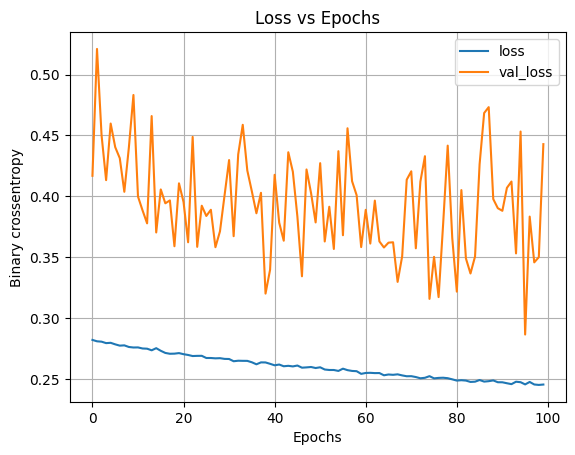

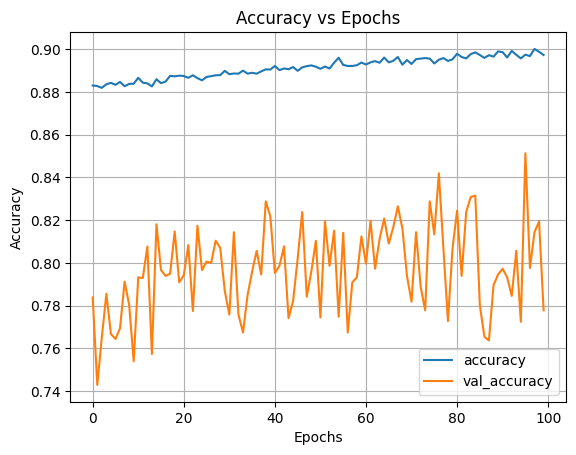

In [46]:
plot_loss(history)
plot_accuracy(history)

#To Make this NN more accurate just doing some changes

In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
  return nn_model, history

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epoches = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"Training model with {num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epoches)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model
